In [1]:
from Stock_data import Stock_Data
import torch
import torch.nn as nn

import torch.optim as optim
from torch_geometric.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

from models import train, MultiLayerLSTM, get_regression_error, plot_regression

In [2]:
dataset = Stock_Data(root='data/Ashare100', past_window=25, future_window=1, force_reload=True,
                     train_ratio=0.6, val_ratio=0.2, is_scale=True)

Processing...
Done!


In [3]:
from torch.utils.data import Subset
from torch_geometric.loader import DataLoader

train_loader = DataLoader(Subset(dataset, dataset.train_idx.tolist()), batch_size=32, shuffle=True)
val_loader   = DataLoader(Subset(dataset, dataset.val_idx.tolist()),   batch_size=32, shuffle=False)
test_loader  = DataLoader(Subset(dataset, dataset.test_idx.tolist()),  batch_size=32, shuffle=False)

in_channels = dataset.num_node_features
out_channels = 1
hidden_size = 16
num_layers = 2
dropout = 0.6

model = MultiLayerLSTM(input_size=in_channels, hidden_size=hidden_size, output_size=out_channels,
                      num_layers=num_layers, dropout=dropout)

In [4]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters in the model: {total_params}")

Total number of parameters in the model: 4305


In [5]:
lr = 1e-3
weight_decay = 1e-5
num_epochs = 50

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

In [14]:
train(model, optimizer, criterion, train_loader, train_loader, num_epochs, "LSTM_Baseline", measure_acc=False)

Epochs: 100%|██████████| 50/50 [00:29<00:00,  1.70it/s, Batch=100.0%, Loss: 0.045462]


In [7]:
mse, rmse, mae, mre = get_regression_error(model, train_loader)
print(f"Train MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, MRE: {mre:.4f}")

Train MSE: 0.0425, RMSE: 0.2061, MAE: 0.1463, MRE: 0.1855


In [13]:
mse, rmse, mae, mre = get_regression_error(model, val_loader)
print(f"Test MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, MRE: {mre:.4f}")

Test MSE: 0.7156, RMSE: 0.8098, MAE: 0.3981, MRE: 0.2305


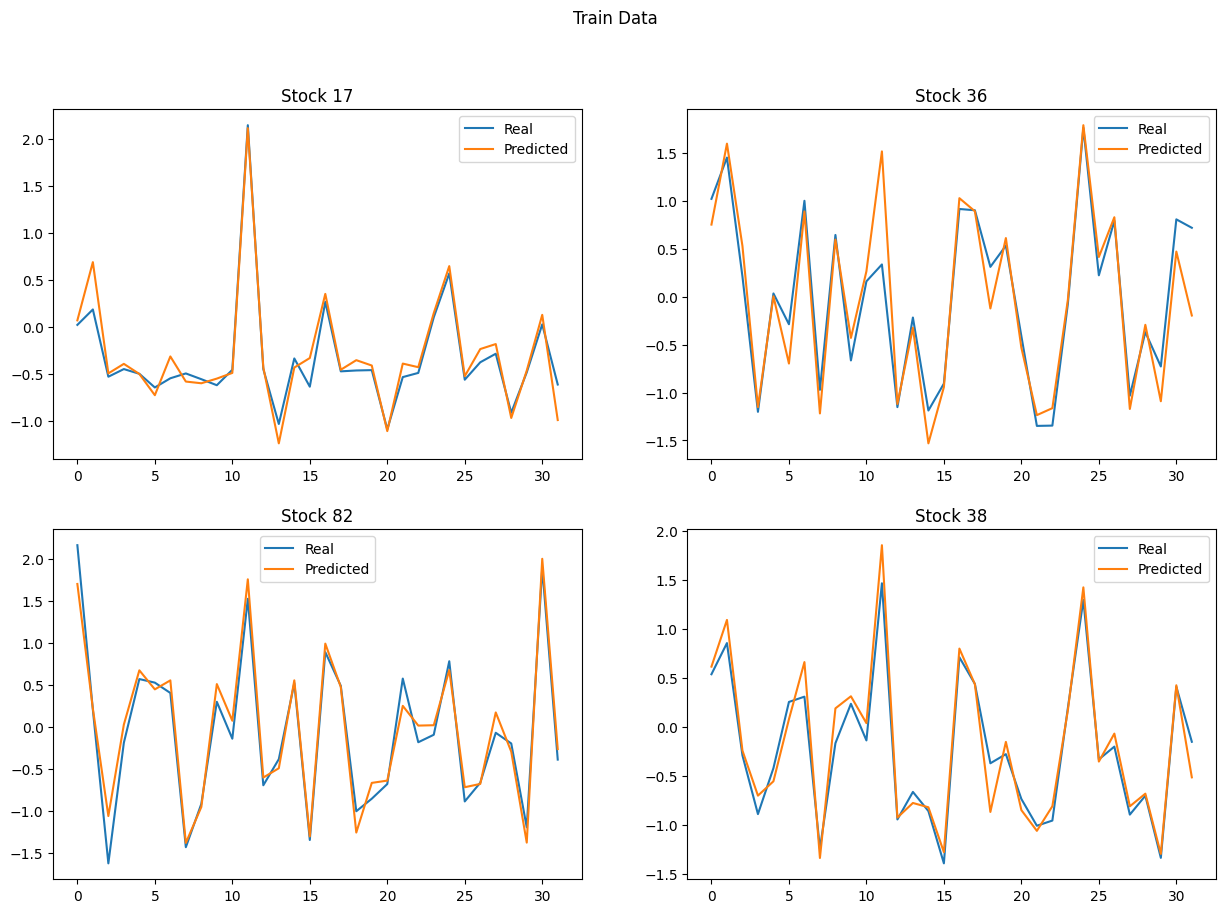

In [9]:
plot_regression(model, next(iter(train_loader)), "Train Data")

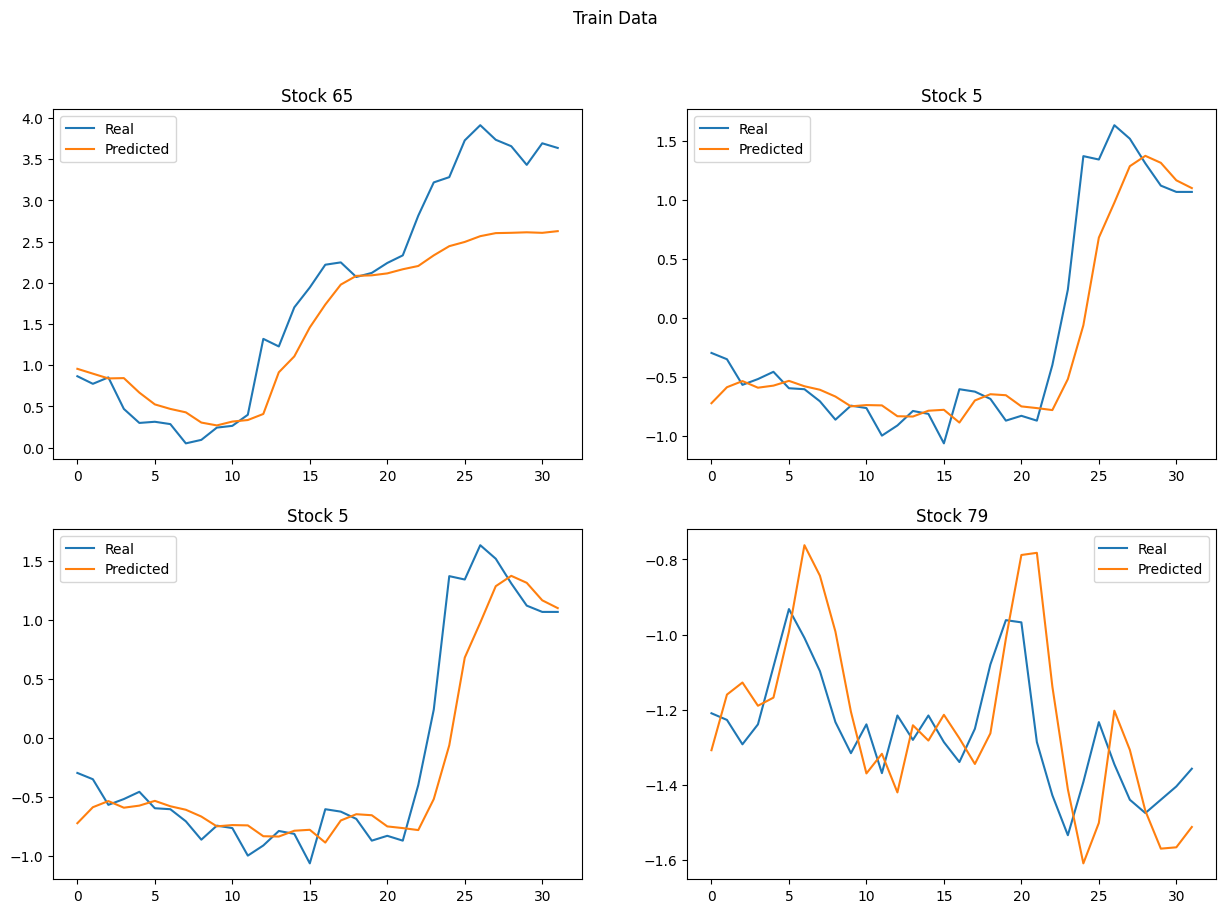

In [11]:
plot_regression(model, next(iter(val_loader)), "Train Data")

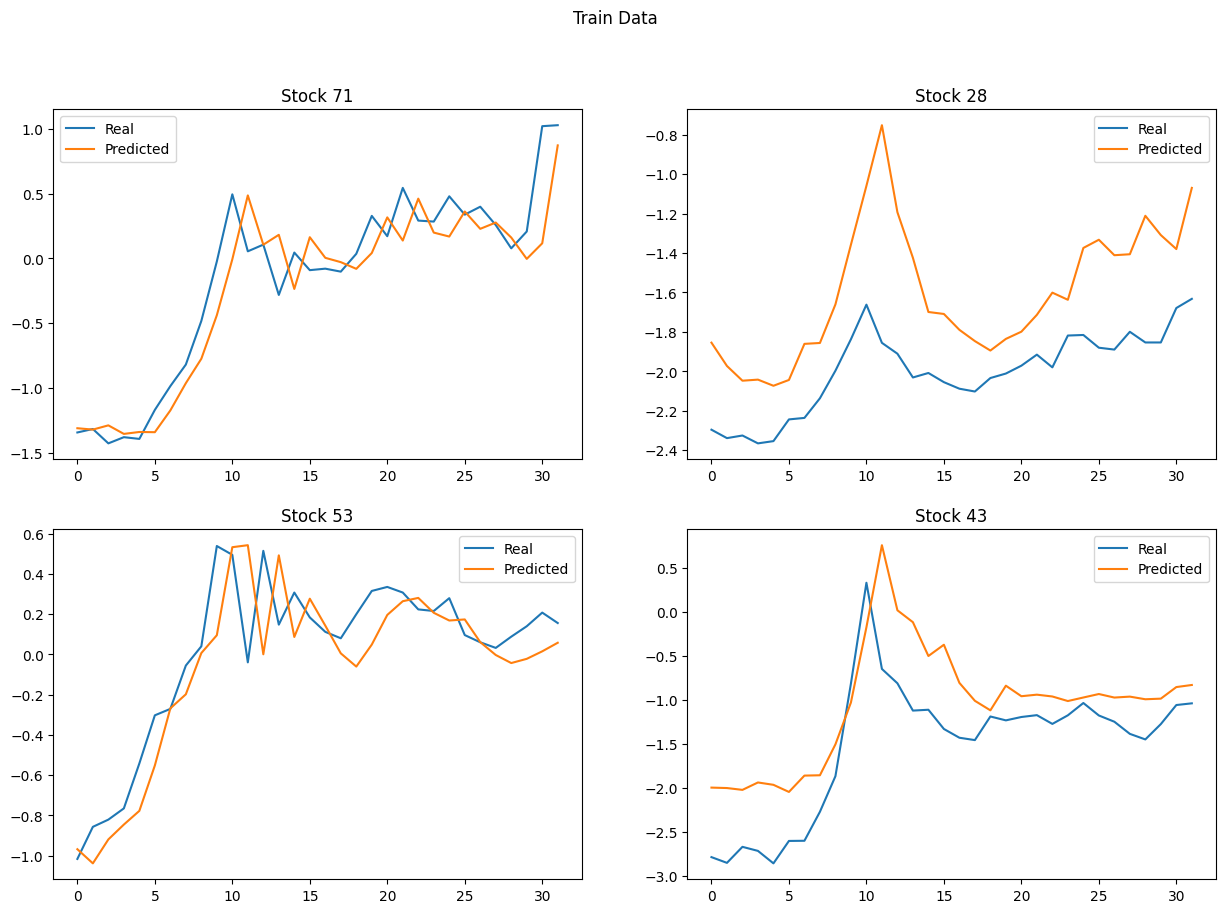

In [12]:
plot_regression(model, next(iter(test_loader)), "Train Data")